**IMPORTAÇÃO DOS DADOS**



In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols

In [42]:
vendas = pd.read_excel("vendas.xlsx")
vendas['descricao'] = vendas['descricao'].str.lower()
vendas['categoria'] = vendas['categoria'].str.lower()
vendas.head(10)

,ID,codigo,descricao,categoria,valor_unidade,quantidade_vendida,valor_total
0,13503,7894900027013,refrigerante coca-cola 2l,bebidas,12.13,1150,13951.70
1,13601,7891962051338,pão de forma visconti tradicional 400g,padaria,8.99,531,4773.69
2,13808,7896025992009,refrigerante convenção guaraná 2l,bebidas,6.00,696,4176.00
3,25249,7898915949193,cerveja pilsen puro malte império lata 473ml,bebida alcoolica,5.60,710,3976.00
4,20169,7891095031115,batata palha yoki 105g,mercearia,9.75,239,2330.25
5,13548,7898955617526,queijo mussarela president 150g,frios,13.60,154,2094.40
6,14851,7891149011001,cerveja brahma lata 473ml,bebida alcoolica,6.00,339,2034.00
7,13641,7896183202187,leite quatá integral 1l,laticinios,7.90,238,1880.20
8,13496,7891991009164,cerveja antarctica latao 473ml,bebida alcoolica,6.00,303,1818.00
9,13505,7894900051513,refrigerante fanta uva 2l,bebidas,10.08,179,1805.15


**ANÁLISE EXPLORATÓRIA**

Verificar se há dados faltantes.

In [43]:
vendas.isna().sum()

ID                    0
codigo                0
descricao             0
categoria             8
valor_unidade         0
quantidade_vendida    0
valor_total           0
dtype: int64

Retirar as linhas com os dados faltantes.

In [44]:
vendas = vendas.dropna()
vendas.isna().sum()

ID                    0
codigo                0
descricao             0
categoria             0
valor_unidade         0
quantidade_vendida    0
valor_total           0
dtype: int64

In [45]:
linhas = vendas.shape[0]
print(f'A base de dados possui {linhas} itens')

A base de dados possui 911 itens


In [46]:
receita_mes = vendas['valor_total'].sum()
itens = vendas['quantidade_vendida'].sum()
valor_medio = vendas['valor_unidade'].mean()
print(f'A quantidade total de itens vendidos foi de {itens}')
print(f'O preço médio unitário foi de R${valor_medio: .2f}')
print(f'A receita total das vendas do mês foi de R${receita_mes: .2f}')

A quantidade total de itens vendidos foi de 26709
O preço médio unitário foi de R$ 10.48
A receita total das vendas do mês foi de R$ 160748.11


In [53]:
print('Lista de categorias')
pd.DataFrame(vendas['categoria'].unique()).sort_values(0).reset_index(drop = True)

Lista de categorias


,0
0,bala
1,bebida alcoolica
2,bebidas
3,biscoitos
4,bolos
5,chocolate
6,congelados
7,doces
8,frios
9,higiene pessoal


**QUANTIDADE VENDIDA E RECEITA TOTAL POR CATEGORIA**


Para avaliar as categorias mais importantes para o comércio.

In [54]:
soma_grupos = vendas.groupby('categoria').sum().sort_values('valor_total', ascending = False)
vendas_agrupada = soma_grupos[['quantidade_vendida', 'valor_total']]
vendas_agrupada

<ipython-input-54-d8e7260ac2f8>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  soma_grupos = vendas.groupby('categoria').sum().sort_values('valor_total', ascending = False)


,quantidade_vendida,valor_total
categoria,,
bebidas,5971,36589.63
mercearia,4076,22888.78
sorvetes,2973,18115.10
congelados,1141,15643.46
chocolate,3355,14088.98
biscoitos,2922,13714.70
bebida alcoolica,1702,10530.00
padaria,812,7603.59
laticinios,609,5560.22


**GRÁFICO COM MAIORES RECEITAS POR CATEGORIA**

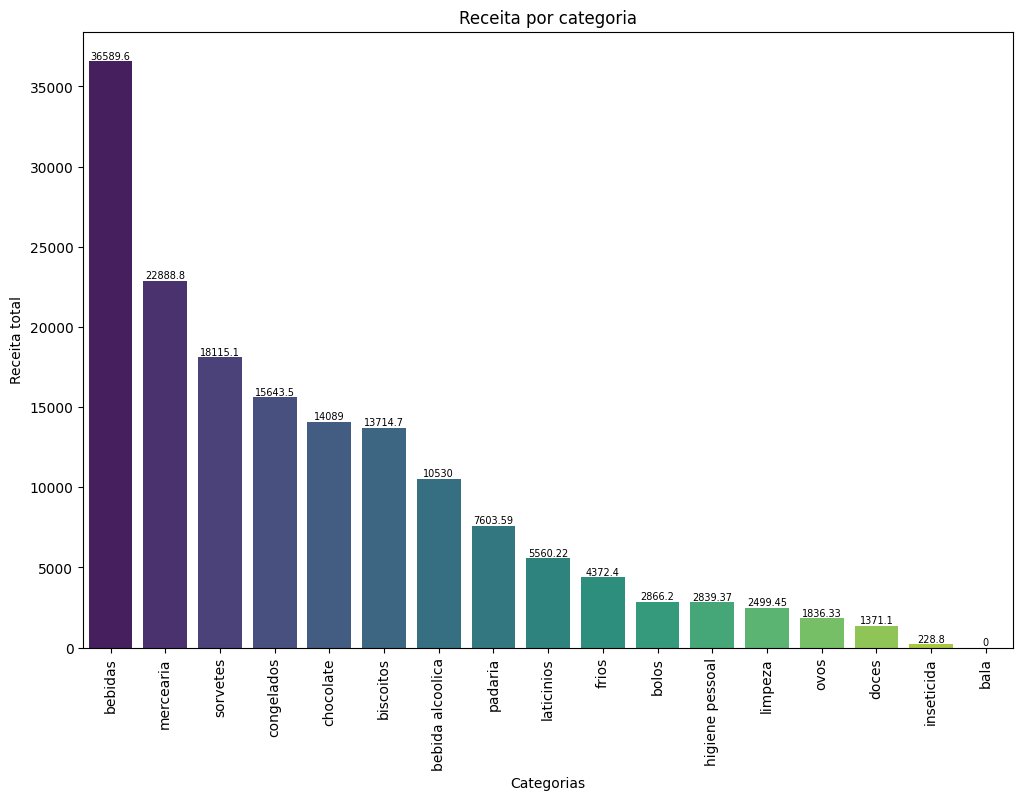

In [55]:
grafico = sns.barplot(data=vendas_agrupada, x = vendas_agrupada.index, y = 'valor_total', palette = 'viridis')
grafico.bar_label(grafico.containers[0], fontsize=7)
grafico.set_title('Receita por categoria')
grafico.set(xlabel = 'Categorias', ylabel = 'Receita total')
grafico.figure.set_size_inches(12, 8)
plt.xticks(rotation = 90)
plt.show()


**RECEITA MÉDIA POR CATEGORIA**

Para avaliar se um determinado item está com a receita acima ou abaixo da média da categoria.

In [56]:
receita_media = vendas.groupby('categoria').mean('valor_total')
receita_media[['valor_total']]

,valor_total
categoria,
bala,0.000000
bebida alcoolica,405.000000
bebidas,345.185189
biscoitos,149.072826
bolos,179.137500
chocolate,293.520417
congelados,143.517982
doces,152.344444
frios,218.620000


**GRÁFICO COM A RECEITA MÉDIA POR CATEGORIA**

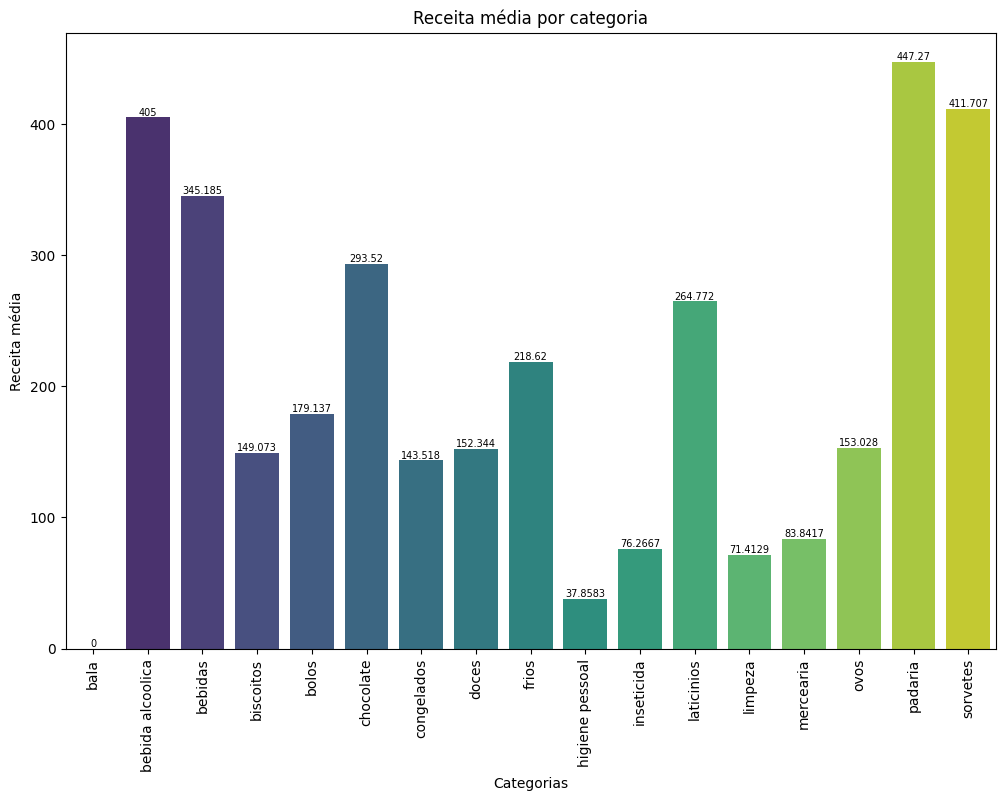

In [57]:
grafico = sns.barplot(data=receita_media, x = receita_media.index, y = 'valor_total', palette = 'viridis')
grafico.bar_label(grafico.containers[0], fontsize=7)
grafico.set_title('Receita média por categoria')
grafico.set(xlabel = 'Categorias', ylabel = 'Receita média')
grafico.figure.set_size_inches(12, 8)
plt.xticks(rotation = 90)
plt.show()

Verificar se a receita total do item está acima da receita média da categoria.

In [58]:
item_indice = 10 #digitar o índice do produto que se quer verificar
categoria_item = vendas['categoria'].iloc[item_indice]
receita_item = vendas['valor_total'].iloc[item_indice]
receita_media_categoria = receita_media['valor_total'].loc[categoria_item]
vendas_media = vendas[['descricao','categoria', 'valor_total']].iloc[item_indice]
vendas_media['receita_media'] = receita_media_categoria
if receita_item > receita_media_categoria:
  print(f'A receita total do item selecionado é MAIOR que a receita média da categoria em que se encontra.')
else:
  print(f'A receita total do item selecionado é MENOR que a receita média da categoria em que se encontra.')
pd.DataFrame(vendas_media)


A receita total do item selecionado é MAIOR que a receita média da categoria em que se encontra.


,10
descricao,lasanha bolonhesa perdigão pacote 600g
categoria,congelados
valor_total,1759.5
receita_media,143.517982


**CATEGORIAS COM MAIOR PERCENTUAL DE ITENS QUE NÃO FORAM VENDIDOS**

Para reavaliar o estoque das categorias com grande percentual de itens não vendidos.

In [59]:
zero_vendas = vendas.query('quantidade_vendida == 0')
zero_agrupado = zero_vendas.groupby('categoria').count()
zero_agrupado['nao_vendidos'] = zero_agrupado['valor_total']
total_itens = vendas.groupby('categoria').count()
zero_agrupado['total_itens'] = total_itens['valor_total']
zero_agrupado = zero_agrupado[['nao_vendidos', 'total_itens']]
zero_agrupado['percentual'] = zero_agrupado['nao_vendidos'] / zero_agrupado['total_itens']
zero_agrupado = zero_agrupado.sort_values('percentual', ascending = False)
zero_agrupado


,nao_vendidos,total_itens,percentual
categoria,,,
bala,5,5,1.000000
padaria,14,17,0.823529
frios,16,20,0.800000
higiene pessoal,59,75,0.786667
inseticida,2,3,0.666667
mercearia,176,273,0.644689
ovos,7,12,0.583333
congelados,63,109,0.577982
bebida alcoolica,15,26,0.576923


**GRÁFICO COM MAIOR PERCENTUAL DE ITENS NÃO VENDIDOS POR CATEGORIA**

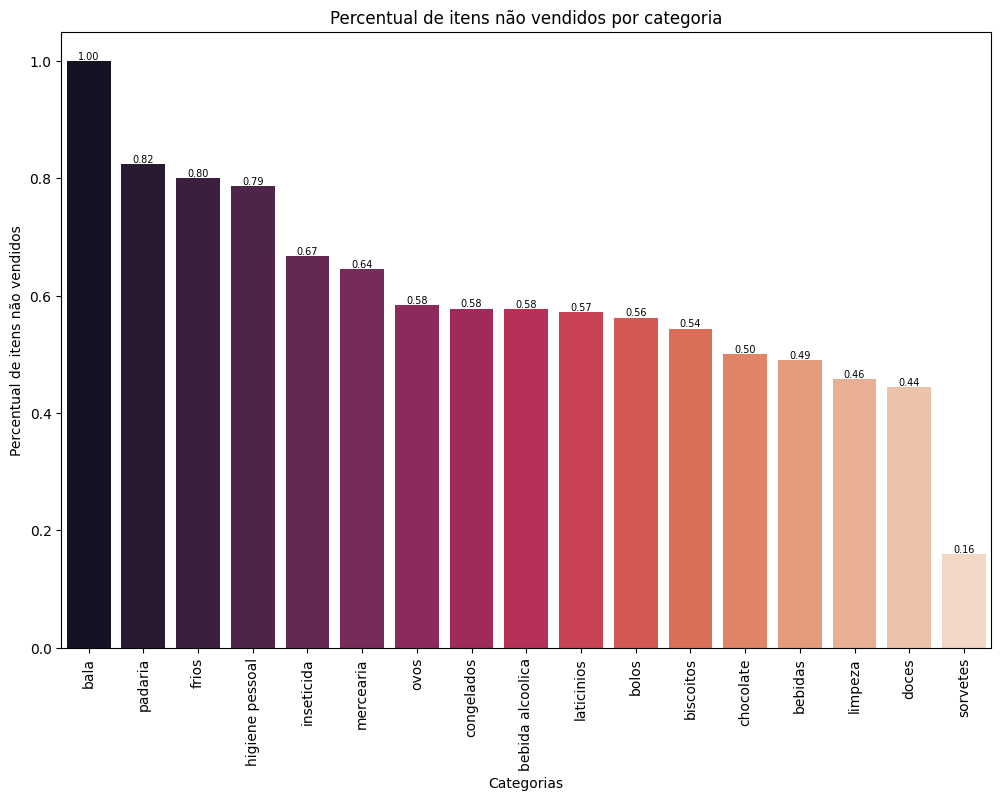

In [64]:
grafico = sns.barplot(data=zero_agrupado, x = zero_agrupado.index, y = 'percentual', palette = 'rocket')
grafico.bar_label(grafico.containers[0], fontsize=7, fmt='%.2f')
grafico.set_title('Percentual de itens não vendidos por categoria')
grafico.set(xlabel = 'Categorias', ylabel = 'Percentual de itens não vendidos')
grafico.figure.set_size_inches(12, 8)
plt.xticks(rotation = 90)
plt.show()

**ITENS MAIS VENDIDOS POR CATEGORIA**

Priorizar os itens mais vendidos na reavaliação dos estoques por categoria.

In [65]:
mais_vendidos = vendas.groupby('categoria').max('quantidade_vendida')
mais_vendidos['categoria'] = mais_vendidos.index
mais_vendidos = mais_vendidos.merge(vendas[['ID','descricao']], on = 'ID')
mais_vendidos = mais_vendidos.query('quantidade_vendida != 0')
mais_vendidos[['categoria', 'codigo','descricao', 'quantidade_vendida', 'valor_total']]


,categoria,codigo,descricao,quantidade_vendida,valor_total
1,bebida alcoolica,8712000025649,bebida mista alcoólica skol beats senses garra...,710,3976.00
2,bebidas,7898956624417,água mineral natural sem gás pureza vital garr...,1150,13951.70
3,biscoitos,7896253401731,biscoito água e sal adria pacote 170g,212,1219.00
4,bolos,7896002363259,bolo laranja com pedaços de chocolate bauducco...,101,1166.20
5,chocolate,7899970402876,barra de chocolate ao leite com pastilha de ch...,604,1696.23
6,congelados,8710679009045,frango a passarinho congelado temperado sadia 1kg,148,1759.50
7,doces,7898591450686,rosquinha recheada rancheiro baunilha 90g,1109,887.20
8,frios,7898955617526,mortadela defumada fatiada gourmet seara 180g,154,2094.40
9,higiene pessoal,7899674024312,sabonete barra hidrata & perfuma palmolive nat...,113,734.50
10,inseticida,7894650012888,"inseticida aerossol mata baratas e formigas, b...",13,228.80


**RELAÇÃO ENTRE VALOR UNITÁRIO COM A QUANTIDADE VENDIDA E A RECEITA**

Avaliar se há relação entre o preço do produto e a receita total. Valores mais próximos de 1 indicam alta relação e mais próximos de -1, indicam alta relação inversamente proporcional. Já valores próximos de 0 indicam baixa relação.

<Axes: >

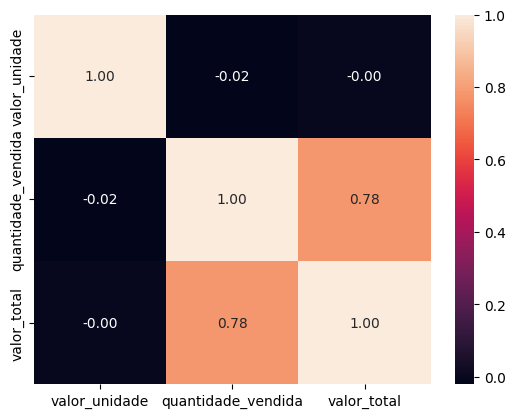

In [63]:
correlacao = vendas[['valor_unidade', 'quantidade_vendida', 'valor_total']].corr()
sns.heatmap(correlacao, annot = True, fmt=".2f")

Verifica-se que não há relação entre o valor de um item e a receita total do mesmo. Também não há relação desse valor com a quantidade de itens vendidos. Obviamente, a quantidade de itens vendidos determina a receita total do item.
Abaixo, podemos realizar testes verificando a tabela de correlação para uma categoria de produto selecionada.

<Axes: >

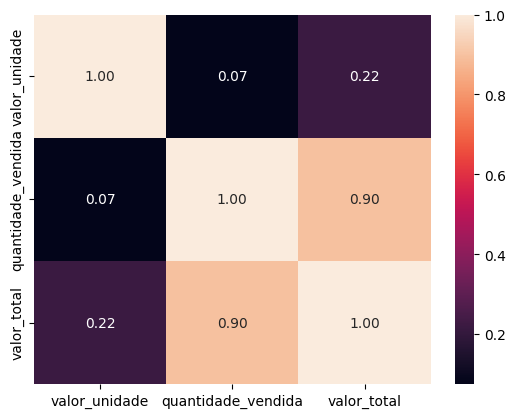

In [66]:
tipo = 'bebidas' #aqui pode escolher o nome da categoria para teste
vendas_categoria = vendas[vendas['categoria'] == tipo]
correlacao = vendas_categoria[['valor_unidade', 'quantidade_vendida', 'valor_total']].corr()
sns.heatmap(correlacao, annot = True, fmt=".2f")


A escolha da categoria pode influenciar na relação das variáveis. Podemos
transformar a variável 'categoria' em variáveis dummies, onde cada item receberá o valor de 0 ou 1 para cada categoria, sendo 1 atribuido à categoria ao qual o item pertence e 0 às demais. Assim podemos vizualizar se há correlação considerando todas as categorias.

<Axes: >

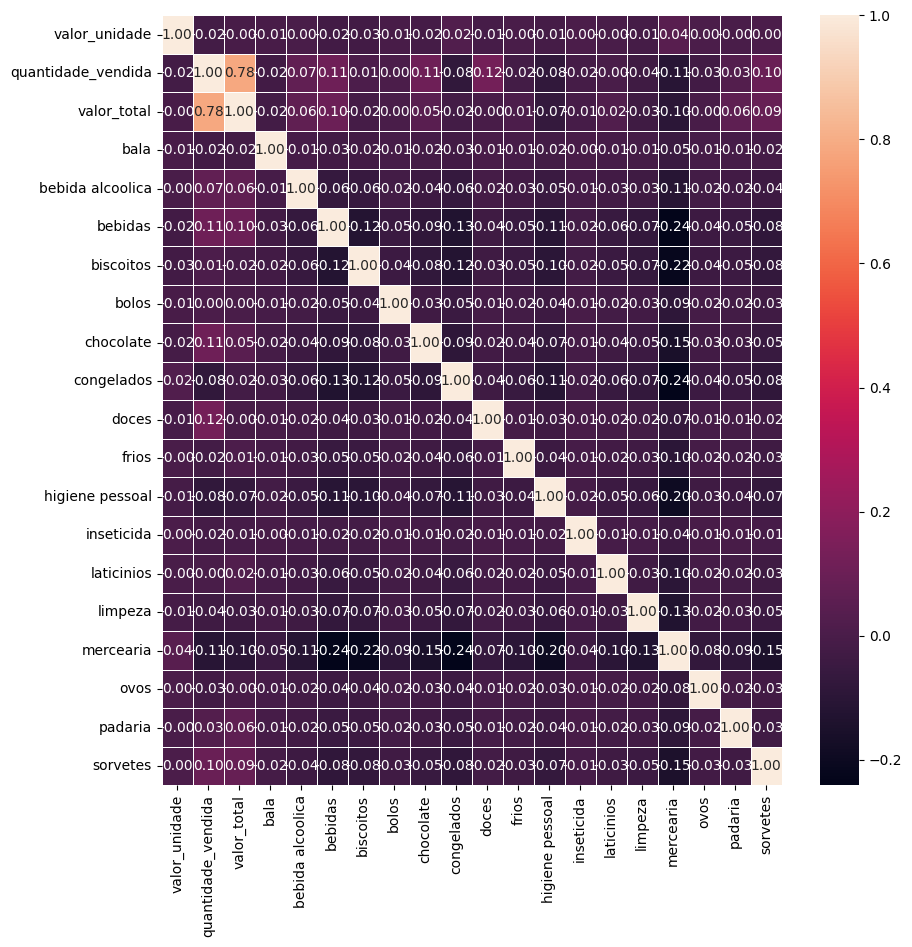

In [67]:
dummies = pd.get_dummies(vendas['categoria'])
vendas_quanti = vendas[['valor_unidade', 'quantidade_vendida','valor_total']]
vendas_dummies = pd.concat([vendas_quanti, dummies], axis = 1)
correlacao = vendas_dummies.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlacao, annot = True, fmt=".2f", linewidths = .5, ax=ax)

**REGRESSÃO LINEAR**

Verificação de outliers com boxplot.

<Axes: xlabel='valor_unidade'>

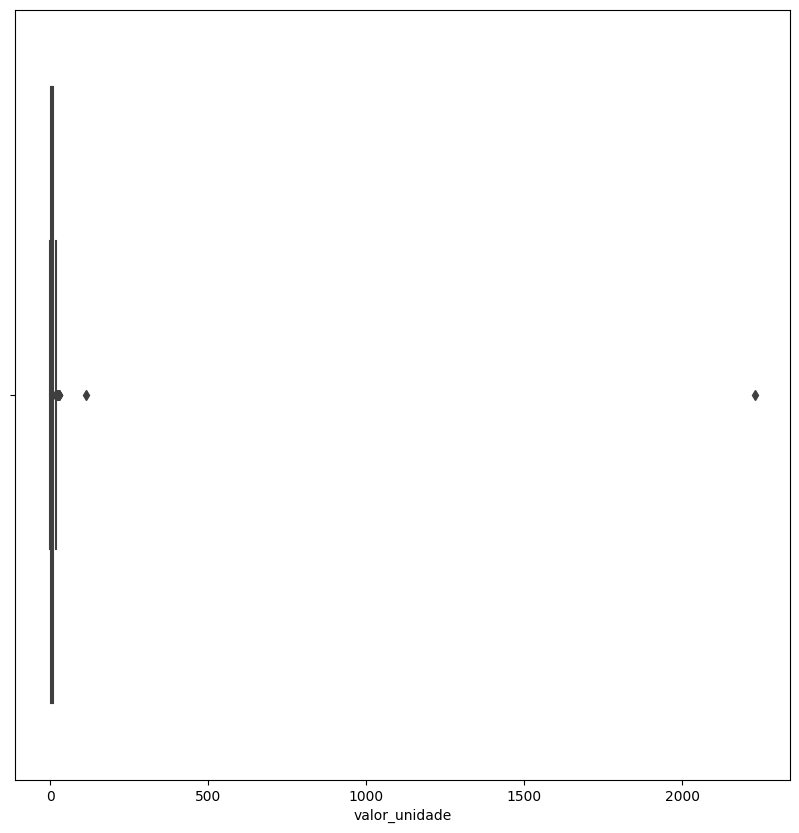

In [68]:
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'valor_unidade', data = vendas, ax = ax)

Retirando outliers

<Axes: xlabel='valor_unidade'>

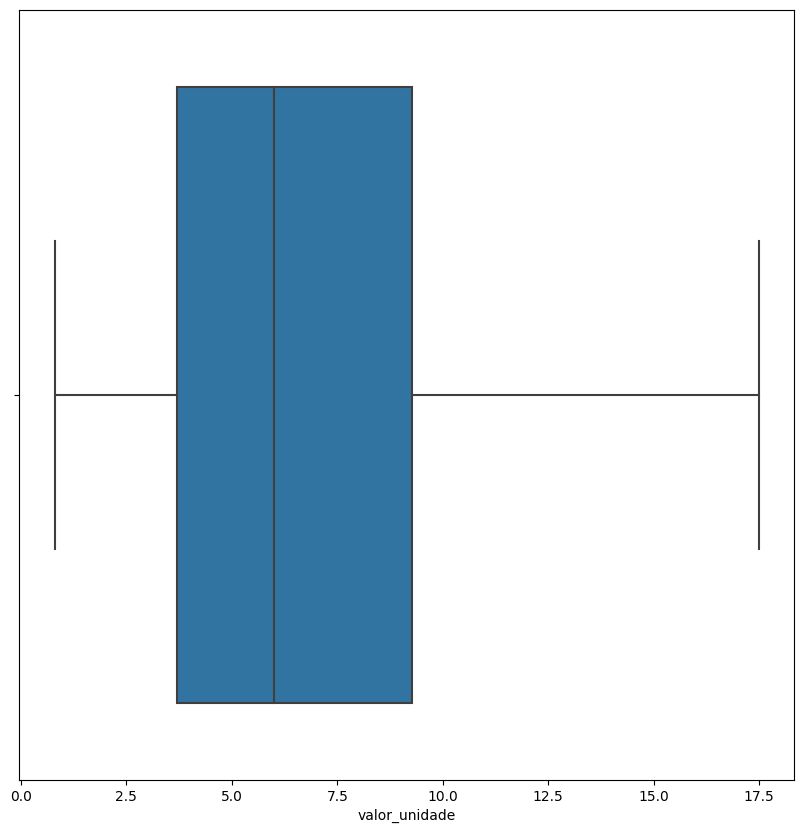

In [69]:
vendas_sem_outliers = vendas.query('valor_unidade <= 17.5')
vendas_sem_outliers = vendas_sem_outliers.query('quantidade_vendida > 0')
fig, ax = plt.subplots(figsize=(10,10))
sns.boxplot(x = 'valor_unidade', data = vendas_sem_outliers, ax = ax)

**GRÁFICO DE DISPERSÃO**

<Axes: title={'center': 'Quantidade vendida por preço unitário'}, xlabel='Preço unitário', ylabel='Quantidade vendida'>

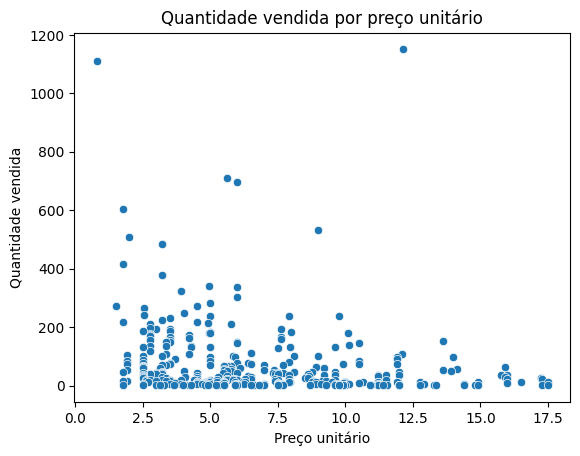

In [70]:
grafico = sns.scatterplot(x = 'valor_unidade', y = 'quantidade_vendida', data = vendas_sem_outliers)
grafico.set_title('Quantidade vendida por preço unitário')
grafico.set(xlabel = 'Preço unitário', ylabel = 'Quantidade vendida')
grafico

**RETA DE REGRESSÃO LINEAR**

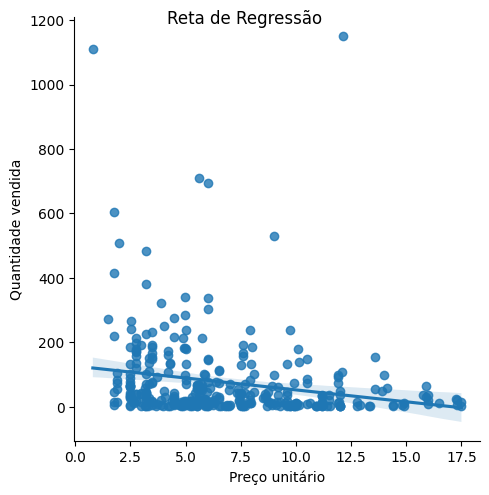

In [71]:
grafico = sns.lmplot(x="valor_unidade", y="quantidade_vendida", data=vendas_sem_outliers)
grafico.fig.suptitle('Reta de Regressão')
grafico.set(xlabel = 'Preço unitário', ylabel = 'Quantidade vendida')
grafico

**MODELO DE REGRESSÃO LINEAR**

In [72]:
modelo = ols("quantidade_vendida ~ categoria + valor_unidade", data = vendas_sem_outliers).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     quantidade_vendida   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.119
Method:                 Least Squares   F-statistic:                     4.085
Date:                Tue, 07 Nov 2023   Prob (F-statistic):           7.44e-07
Time:                        16:52:27   Log-Likelihood:                -2122.8
No. Observations:                 342   AIC:                             4278.
Df Residuals:                     326   BIC:                             4339.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      202.6154     40.450      5.009      0.000     123.040     282.191
categoria[T.bebidas]           -51.8381     40.761     -1.272      0.204    -132.026      28.350
categoria[T.biscoitos]         -97.2116     41.849     -2.323      0.021    -179.539     -14.884
categoria[T.bolos]             -97.0262     59.621     -1.627      0.105    -214.317      20.265
categoria[T.chocolate]         -26.0342     44.931     -0.579      0.563    -114.426      62.358
categoria[T.congelados]        -96.2016     44.682     -2.153      0.032    -184.103      -8.300
categoria[T.doces]              69.7566     66.865      1.043      0.298     -61.786     201.299
categoria[T.frios]             -33.1635     72.599     -0.457      0.648    -175.984     109.657
categoria[T.higiene pessoal]  -121.7556     48.202     -2.526      0.012    -216.581     -26.930
categoria[T.laticinios]        -70.2123     55.563     -1.264      0.207    -179.520      39.095
categoria[T.limpeza]          -139.4716     46.711     -2.986      0.003    -231.364     -47.579
categoria[T.mercearia]        -113.7178     39.243     -2.898      0.004    -190.919     -36.517
categoria[T.ovos]              -72.1585     69.308     -1.041      0.299    -208.506      64.189
categoria[T.padaria]           132.9960     80.302      1.656      0.099     -24.980     290.972
categoria[T.sorvetes]          -59.4295     45.950     -1.293      0.197    -149.824      30.966
valor_unidade                   -6.6976      2.261     -2.962      0.003     -11.147      -2.249
==============================================================================
Omnibus:                      339.436   Durbin-Watson:                   0.876
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            12228.221
Skew:                           4.178   Prob(JB):                         0.00
Kurtosis:                      31.077   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Apenas as categorias biscoitos, congelados, higiene pessoal, limpeza e mercearia, além do valor unitário, se demonstraram estatisticamente relevantes (pvalor < 0,05). O R-squared é de apenas 15.8%, demonstrando um fraco desempenho do modelo com os dados informados até o momento.

**FAZENDO A PREVISÃO**

Inserir novo produto de categoria considerada estatisticamente relevante conforme análise anterior do modelo. Com os dados de categoria e valor unitário informados, podemos prever qual seria a quantidade vendida do produto e consequentemente sua receita tota.

In [73]:
tipo = 'limpeza' #escolher a categoria do novo produto. Precisa ser categoria estatísticamente relevante, conforme demonstrado acima.
preco = 3 #escolher o preco unitário do produto
novo_valor = pd.DataFrame({'categoria': [tipo], 'valor_unidade' : [preco]})
previsao = modelo.predict(novo_valor)
previsao

0    43.050921
dtype: float64

In [74]:
quantidade = int(previsao[0].round())
receita = preco * quantidade
print(f'A quantidade total de vendas do novo produto será de {quantidade} unidades')
print(f'A receita total do novo produto será de R${receita: .2f}')

A quantidade total de vendas do novo produto será de 43 unidades
A receita total do novo produto será de R$ 129.00


Para a construção de um modelo melhor recomenda-se o registro de mais variáveis explicativas, como as sub catgorias de cada produto, a qualidade do produto, avaliações baseadas em escala linkert de pesquisa de satisfação, marca do produto, durabilidade, validade próxima ao vencimento, entre outras informações relevantes que influenciam na hora de comprar o produto. Seria interessante a realização de pesquisa com os clientes para determinar quais estes consideram as características mais importantes na hora de comprar um produto e anexar essas características como variáveis na base de dados. Outra informação importante é o custo unitário do produto. Assim, poderíamos calcular, além da receita por produto, o lucro real por produto, sendo mais significativo para avaliar a situação financeira da empresa. Por fim, recomendamos também que haja a informação de estoque de cada item, para avaliar quantas unidades de fato não foram vendidas por item, bem como seu percentual de vendas totais em relação ao estoque.